In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn.apionly as sns
sns.set_style("whitegrid")
sns.set_context("poster")


In [3]:
elect_df = pd.read_csv("data/county_level_election.csv")
elect_df.head()

,state,fipscode,county,population,hispanic,minority,female,unemployed,income,nodegree,bachelor,inactivity,obesity,density,cancer,votergap,trump,clinton
0,Colorado,8117,Summit County,27239,15.173,4.918,45.996,2.5,68352,5.4,48.1,8.1,13.1,46.0,46.2,-27.632,31.530,59.162
1,Colorado,8037,Eagle County,53653,30.040,5.169,47.231,3.1,76661,10.1,47.3,9.4,11.8,31.0,47.1,-19.897,36.058,55.955
2,Idaho,16067,Minidoka County,19226,34.070,5.611,49.318,3.7,46332,24.1,11.8,18.3,34.2,80.0,61.8,54.148,71.135,16.987
3,Colorado,8113,San Miguel County,7558,10.154,4.747,46.808,3.7,59603,4.7,54.4,12.4,16.7,5.7,62.6,-44.769,23.892,68.662
4,Utah,49051,Wasatch County,21600,13.244,4.125,48.812,3.4,65207,9.5,34.4,13.9,23.0,257.8,68.3,25.357,50.471,25.114


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# split 80/20 train-test
X = elect_df[['population','hispanic','minority','female','unemployed','income','nodegree','bachelor','inactivity','obesity','density','cancer']]
response = elect_df['votergap']
Xtraindf, Xtestdf, ytrain, ytest = train_test_split(X,response,test_size=0.2, random_state=1983)


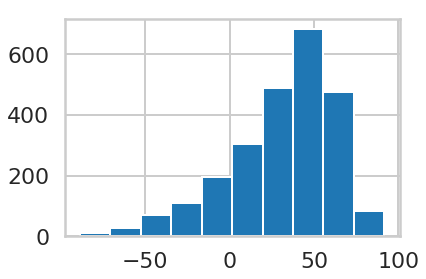

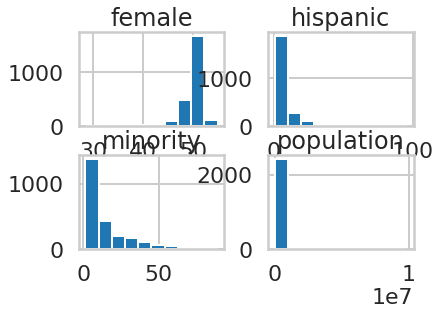

In [6]:
plt.hist(ytrain)
Xtraindf.hist(column=['minority', 'population','hispanic','female']);

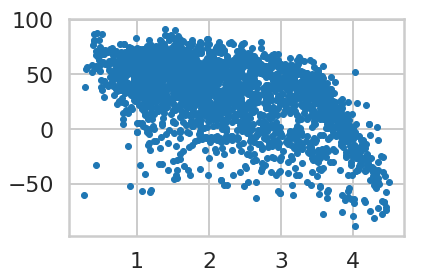

In [7]:
x = Xtraindf['minority'].values
o = np.argsort(x)
x = x[o]
y = ytrain.values
y = y[o]
plt.plot(np.log(x),y,'.')
xx = np.log(x).reshape(-1,1)

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor


In [92]:
from collections import OrderedDict
from sklearn.model_selection import GridSearchCV

param_dict3 = OrderedDict(
    base_estimator__max_depth = [12],
    learning_rate = [2]
    
)

# your code here

best_scores = []


estab = AdaBoostRegressor(base_estimator=
                              DecisionTreeRegressor(max_depth=param_dict3["base_estimator__max_depth"]),n_estimators=2000,\
                              learning_rate=param_dict3["learning_rate"])
gs = GridSearchCV(estab, param_grid = param_dict3, cv=3, n_jobs=-1)
gs.fit(Xtraindf, ytrain)
best_scores = np.append(best_scores, gs.best_score_)
best_scores


array([0.7758255])

In [93]:
gs.score(Xtestdf,ytest)

0.7683801423628139